## This notebook is based on
https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-3-classification-decision-trees-and-k-nearest-neighbors-8613c6b6d2cd

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


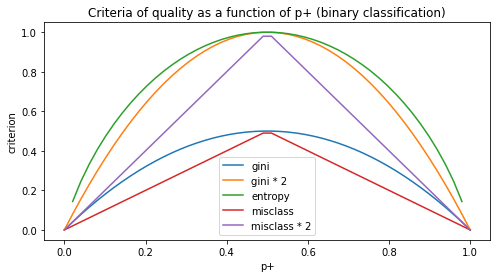

In [2]:
# Draw gini index, misclassification error and entropy
plt.figure(figsize=(8,4))
xx = np.linspace(0,1,50)
plt.plot(xx, [ 2*x*(1-x) for x in xx], label='gini')
plt.plot(xx, [4*x*(1-x) for x in xx], label='gini * 2')
plt.plot(xx, [-x*np.log2(x) - (1-x)*np.log2(1-x) for x in xx], label='entropy')
plt.plot(xx, [1 - max(x, 1-x) for x in xx], label='misclass')
plt.plot(xx, [2 - 2*max(x, 1-x) for x in xx], label='misclass * 2')
plt.xlabel('p+')
plt.ylabel('criterion')
plt.title('Criteria of quality as a function of p+ (binary classification)')
plt.legend()
plt.show()

### Generate 2 sample normal distributions and plot them

In [3]:
np.random.seed(17)
# Create sample 1
train_data = np.random.normal(size=(100,2))
train_labels = np.zeros((100))

# Create sample 2
train_data = np.r_[train_data, np.random.normal(size=(100,2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]


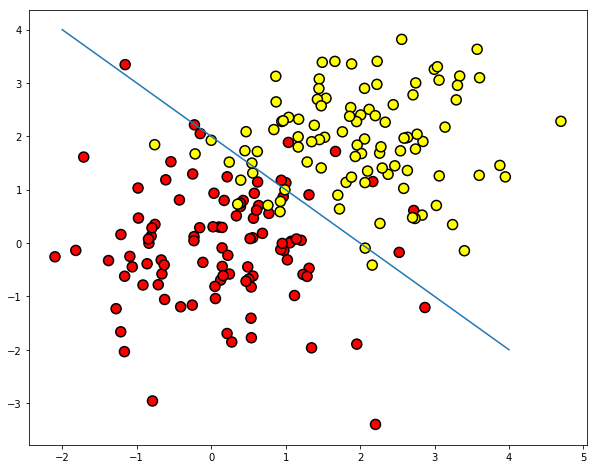

In [4]:
plt.figure(figsize=(10,8))
plt.scatter(train_data[:,0], train_data[:,1], c=train_labels, 
            cmap='autumn', s=100, edgecolors='black', linewidths=1.5)
plt.plot(range(-2,5), range(4,-3,-1));
plt.show()


### Use Sklearn to draw a decision boundary for this line

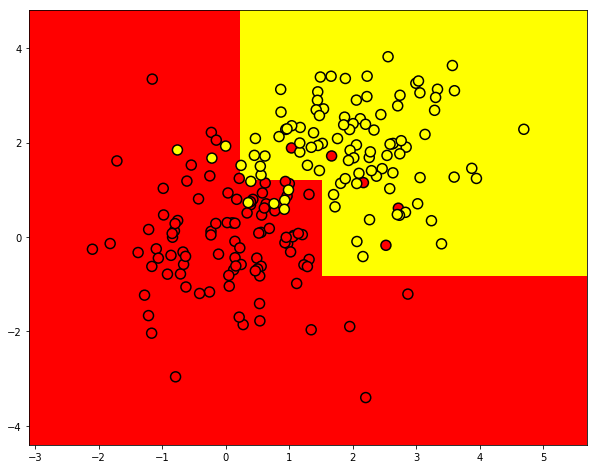

In [5]:
from sklearn.tree import DecisionTreeClassifier

def get_grid(data):
    x_min, x_max = data[:,0].min() -1, data[:, 0].max() + 1
    y_min, y_max = data[:,1].min() -1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    

# Fit the clssifier
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)
clf_tree.fit(train_data, train_labels)

#plot the decision boundary
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.figure(figsize=(10,8))
plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.show()

### Display the tree nodes

In [6]:
# !pip install pydotplus
# !pip install --upgrade pip

In [7]:
import pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, png_file_to_save):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)
    graph.write_png(png_file_to_save)


In [8]:
tree_graph_to_png(clf_tree, feature_names=['x1','x2'], png_file_to_save="./topic3_tree1.png")

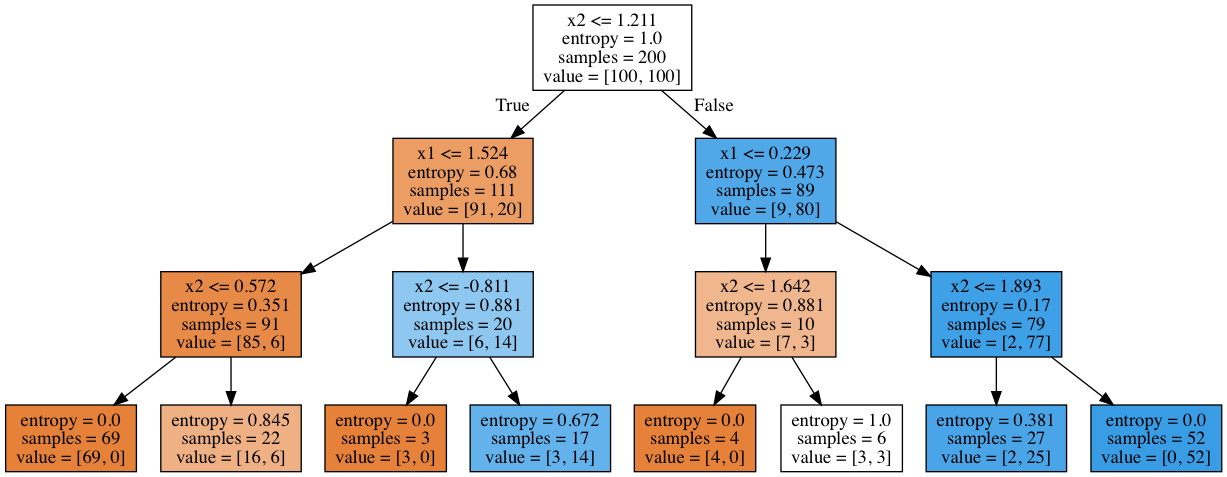

In [9]:
from IPython.display import Image
Image("./topic3_tree1.png")

### Check how the decision tree splits on numerical attributes

In [10]:
data = pd.DataFrame({'Age': [17,64,18,20,38,49,55,25,29,31,33], 
             'Loan Default': [1,0,1,0,1,0,0,1,1,0,1]})
data

,Age,Loan Default
0,17,1
1,64,0
2,18,1
3,20,0
4,38,1
5,49,0
6,55,0
7,25,1
8,29,1
9,31,0


In [11]:
data.sort_values("Age", inplace=True)
data

,Age,Loan Default
0,17,1
2,18,1
3,20,0
7,25,1
8,29,1
9,31,0
10,33,1
4,38,1
5,49,0
6,55,0


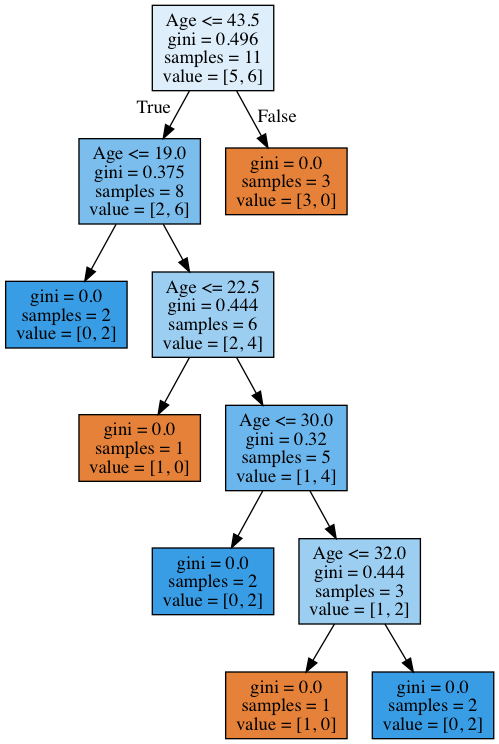

In [12]:
data.sort_values("Age", inplace=True)
Age_tree = DecisionTreeClassifier(random_state=17)
Age_tree.fit(data["Age"].values.reshape(-1,1), data["Loan Default"].values)

tree_graph_to_png(Age_tree, feature_names=["Age"], png_file_to_save="./topic3_tree2.png")
Image("./topic3_tree2.png")

In [13]:
# now use age and salary 
data2 = pd.DataFrame({'Age':  [17, 64, 18, 20, 38, 49, 55, 25, 29, 31, 33], 
                      'Salary': [25, 80, 22, 36, 37, 59, 74, 70, 33, 102, 88], 
             'Loan Default': [1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1]})
data2

,Age,Loan Default,Salary
0,17,1,25
1,64,0,80
2,18,1,22
3,20,0,36
4,38,1,37
5,49,0,59
6,55,0,74
7,25,1,70
8,29,1,33
9,31,0,102


In [14]:
k = data2.sort_values("Age")
print(k)
m = data2.sort_values("Salary")
print(m)


    Age  Loan Default  Salary
0    17             1      25
2    18             1      22
3    20             0      36
7    25             1      70
8    29             1      33
9    31             0     102
10   33             1      88
4    38             1      37
5    49             0      59
6    55             0      74
1    64             0      80
    Age  Loan Default  Salary
2    18             1      22
0    17             1      25
8    29             1      33
3    20             0      36
4    38             1      37
5    49             0      59
7    25             1      70
6    55             0      74
1    64             0      80
10   33             1      88
9    31             0     102


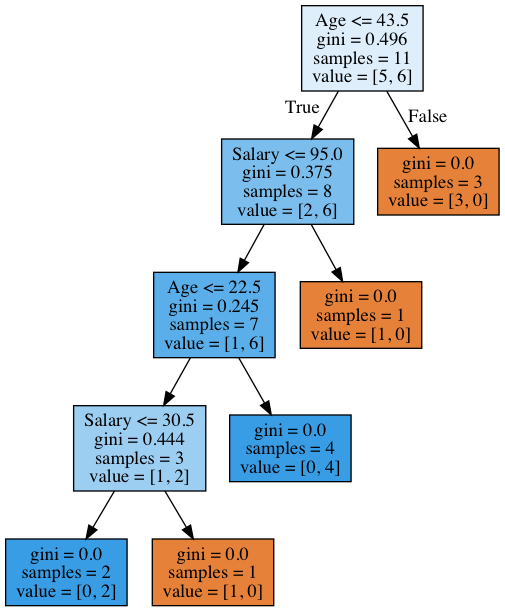

In [15]:
Age_tree_2 = DecisionTreeClassifier(random_state=17)
Age_tree_2.fit(data2[["Age", "Salary"]].values, data2["Loan Default"].values)

tree_graph_to_png(Age_tree_2, feature_names=["Age", "Salary"], png_file_to_save="./topic3_tree3.png")
Image("./topic3_tree3.png")

## Use this function to use a DT regressor
### f(x)=e−x2+1.5∗ e−(x−2)2

### Plot the points, prediction results, and the actual f(x) values for x

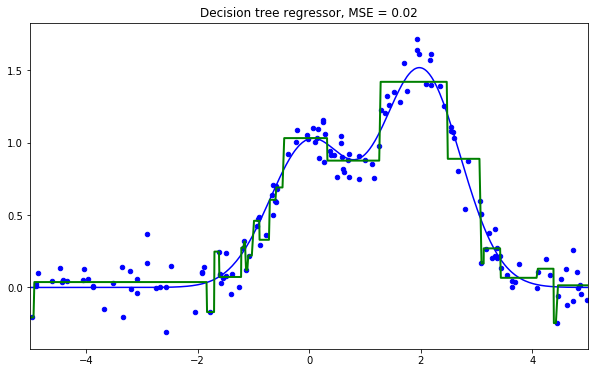

In [20]:
n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % (np.sum((y_test - reg_tree_pred) ** 2) / n_test))
plt.show()

In [30]:
# print(X_train.shape)
# print(y_train.shape)
# print(X_test.shape)
# print(y_test.shape)

In [2]:
import sys


int